In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sys

sys.path.append('../../../DeLASE')
from delase import *

In [2]:
def lorenz(t, pt, rho=28, beta=8/3, sigma=10):
    x, y, z = pt[0], pt[1], pt[2]
    return np.array([sigma*(y - x), x*(rho - z) - y, x*y - beta*z])

In [3]:
x0 = np.random.randn(3)

In [4]:
t_span = [0, 200]
dt = 0.01
t_eval = np.arange(t_span[0], t_span[1], dt)
sol = solve_ivp(lambda t, x: lorenz(t, x), y0=x0, t_eval=t_eval, t_span=t_span)

In [5]:
signal = sol.y.T[2000:]

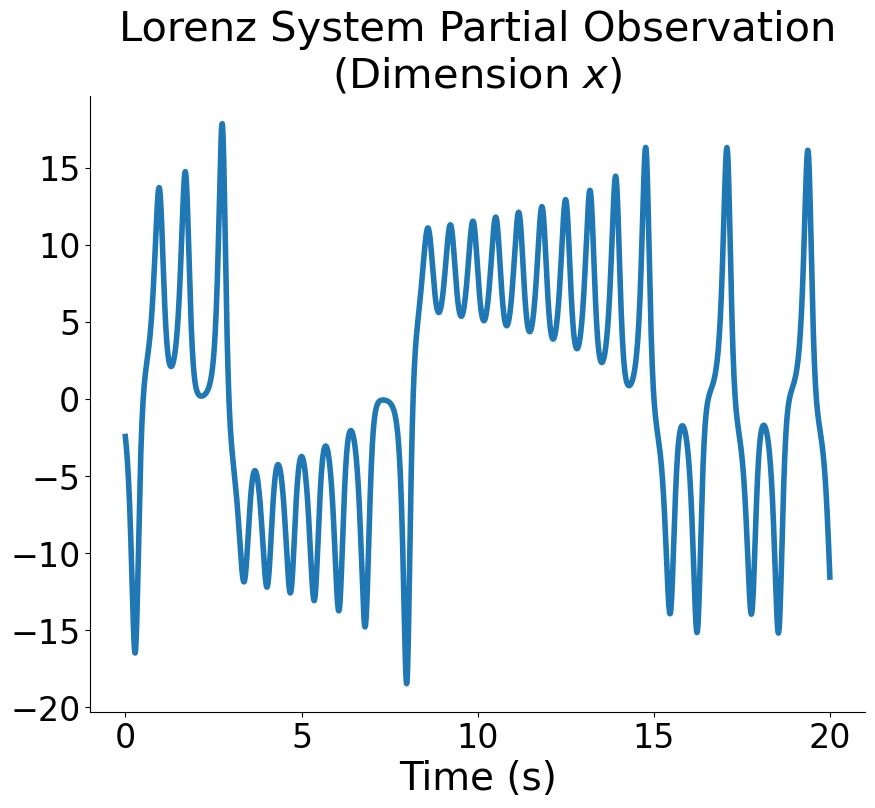

In [9]:
scale = 2
plt.figure(figsize=(5*scale, 4*scale))
plt.plot(np.arange(2000)*dt, signal[:2000, 0], linewidth=4)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', which='both', left=True, right=False)
ax.set_xlabel('Time (s)', fontsize=14*scale)
ax.tick_params(labelsize=12*scale)
ax.set_title('Lorenz System Partial Observation\n(Dimension $x$)', fontsize=15*scale)
plt.show()

In [11]:
delase = DeLASE(signal[:2000, [0]], p=5)

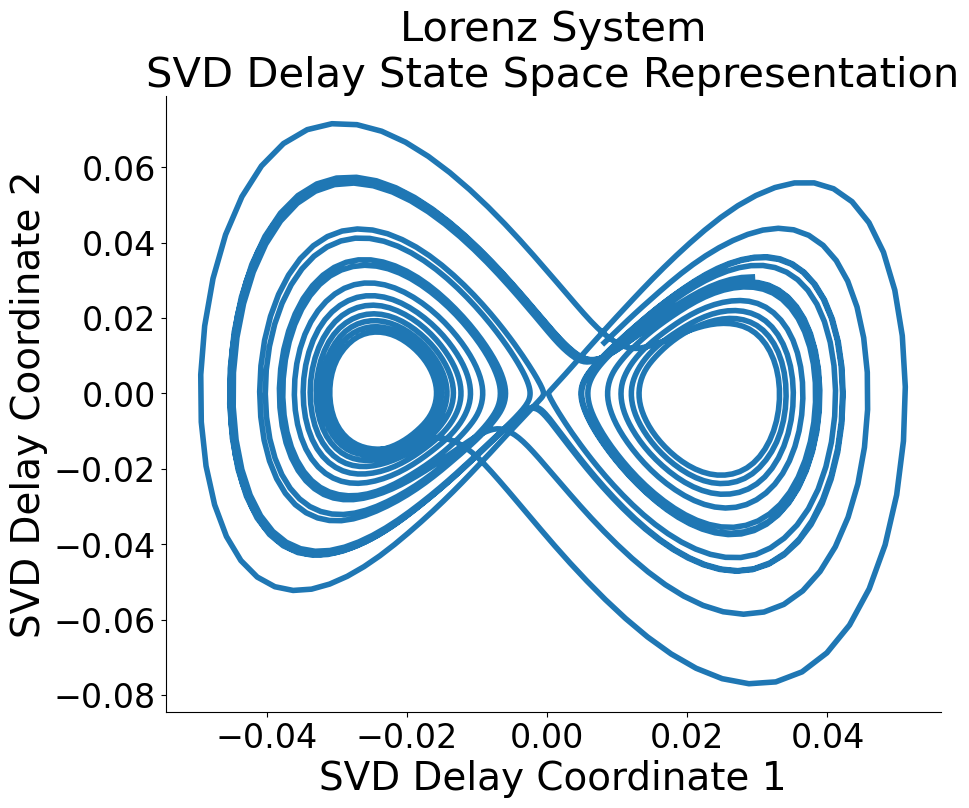

In [13]:
plt.figure(figsize=(5*scale, 4*scale))
plt.plot(delase.V[:, 0], delase.V[:, 1], linewidth=4)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', which='both', left=True, right=False)
ax.set_xlabel('SVD Delay Coordinate 1', fontsize=14*scale)
ax.set_ylabel('SVD Delay Coordinate 2', fontsize=14*scale)
ax.tick_params(labelsize=12*scale)
ax.set_title('Lorenz System\nSVD Delay State Space Representation', fontsize=15*scale)
plt.show()

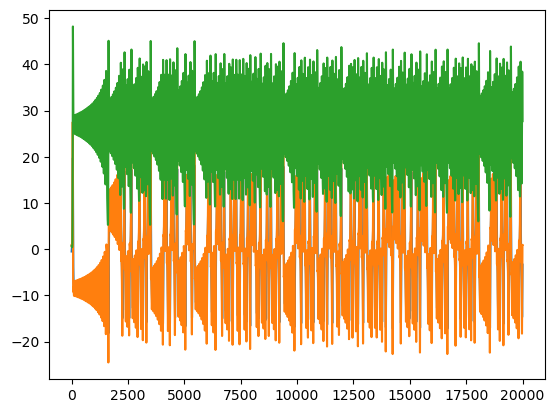

In [13]:
plt.plot(sol.y.T)